### Newton's method

Find roots with **Newton's method** for:


1) $\:f(x) = x\,cos(x) - x^2 \:\:\:  x_0 = 1$

2) $\:f(x) = x^3 - 7x^2 + 8x - 3 \:\:\: x_0 = 5 $

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.1

In [2]:
sess = tf.Session(config=config)
x = tf.placeholder(tf.float32, name="x")
y = x*tf.cos(x) - x**2

grad_y = tf.gradients(y, x, name="grad_y")

In [3]:
X = np.linspace(-1, 1, 100)

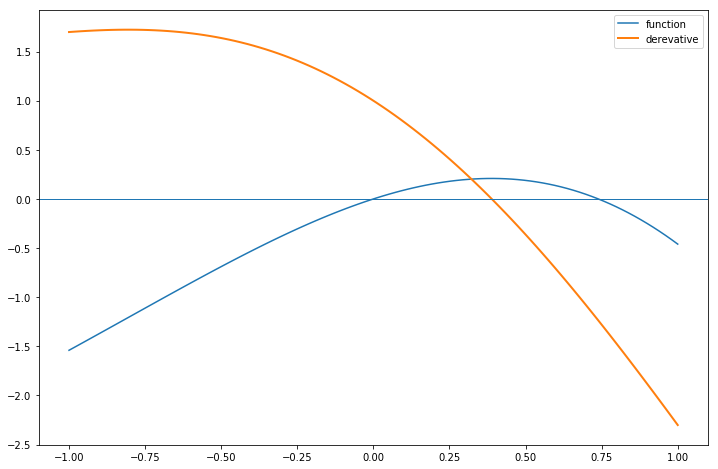

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(X, sess.run(y, {x: X}), label="function")
plt.plot(X, sess.run(grad_y, {x: X})[0],lw=2, label="derevative")
plt.axhline(y=0, linewidth=1)
plt.legend();

In [5]:
iterations = 10
xs1 = [-1]

for _ in range(iterations):
    current_x = xs1[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xs1.append(next_x)

In [6]:
print("root:", xs1[-1])

root: 0.0


In [7]:
sess = tf.Session(config=config)
x = tf.placeholder(tf.float32, name="x")
y = x**3 - 7*x**2+8*x-3

grad_y = tf.gradients(y, x, name="grad_y")

In [8]:
X = np.linspace(-2, 6, 1000)

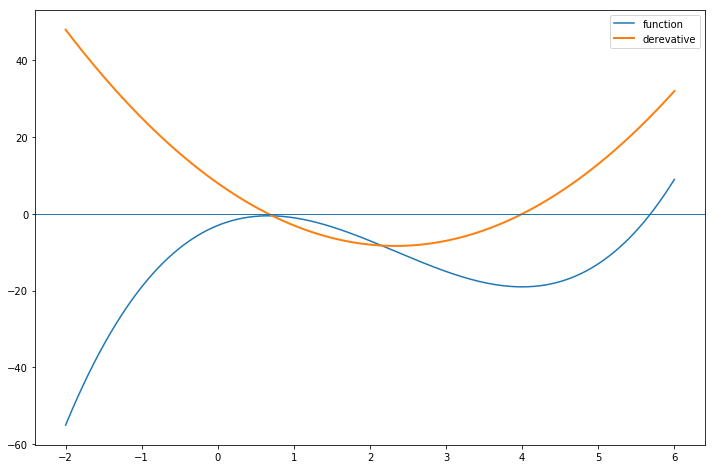

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(X, sess.run(y, {x: X}), label="function")
plt.plot(X, sess.run(grad_y, {x: X})[0],lw=2, label="derevative")
plt.axhline(y=0, linewidth=1)
plt.legend();

In [10]:
iterations = 10
xs1 = [5]

for _ in range(iterations):
    current_x = xs1[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xs1.append(next_x)

In [11]:
print("root:", xs1[-1])

root: 5.6857793614010745


### Softmax

$$\text{softmax}(x)_i = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$

In [12]:
def softmax(sess, x):
    """
    param sess: tf.Session
    param x:  np.array, n-dimentional vector
    returns: np.array n-dimentional vector
    """
    inpt = tf.placeholder(dtype = tf.float32)
    exps = tf.exp(inpt)
    res = exps / tf.reduce_sum(exps)
    return sess.run(res, {inpt: x})

In [13]:
# test
import tensorflow as tf
import numpy as np

In [14]:
with tf.Session() as sess:
    if np.allclose([0.0320586, 0.08714432, 0.23688282, 0.64391426],
                   softmax(sess, np.array([1, 2, 3, 4]))):
        print("Test passed!")
    else:
        print("Test failed!")

Test passed!


$$\text{softmax}(X)_{ij} = \frac{\exp(X_{ij})}{\sum_j \exp(X_{ij})}$$

In [15]:
def softmax_matrix(sess, x):
    """
    Computes softmax for each row vector in matrix.
    
    param sess: tf.Session
    param x:  np.array, (n x m) matrix
    returns: np.array, (n x m) matrix
    """
    inpt = tf.placeholder(dtype = tf.float32, shape = [x.shape[0], x.shape[1]])
    exps = tf.exp(inpt)
    res = exps / tf.reduce_sum(exps, keepdims = True, axis=1)
    return sess.run(res, {inpt: x})

In [16]:
with tf.Session() as sess:
    if np.allclose([[0.10650698, 0.78698604, 0.10650698],
                    [0.09003057, 0.24472847, 0.66524096]],
                   softmax_matrix(sess, np.array([[1,3,1], [-1, 0, 1]]))):
        print("Test passed!")
    else:
        print("Test failed!")

Test passed!


In [17]:
#there was an error with the 2nd row, as the 2nd number was -0.24472847 instead of 0.24472847